In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings as war
war.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder,Normalizer

In [4]:
df = pd.read_csv(r'E:\Github Projects\Spotify-Prediction\data\data.csv')
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [9]:
#Size of the dataset
print(df.shape)

#lets drop the 'Unnamed: 0' column as it not providing any information.
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

(2017, 17)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [11]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [13]:
#Checking for Null values
df.isnull().sum()


#Good we don't have any null values to work on.

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [40]:
num_cols = []
cat_cols = []

def split_columns(df):
    for items in df.columns:
        if df[items].dtypes == 'O':
            cat_cols.append(items)
        else:
            num_cols.append(items)
            
split_columns(df)       

In [41]:
print('Total number of Categorical columns: {}'.format(len(cat_cols)))
print('Total number of Numerical columns: {}'.format(len(num_cols)))
print('Total number of columns: {}'.format(len(cat_cols + num_cols)))


Total number of Categorical columns: 2
Total number of Numerical columns: 14
Total number of columns: 16


1    1020
0     997
Name: target, dtype: int64


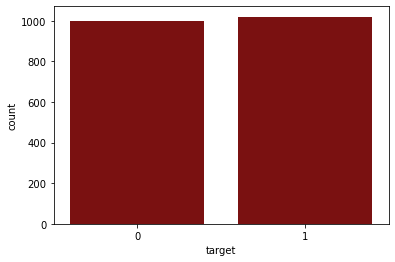

In [46]:
#Lets us now see how our traget column is actually is
sns.countplot(df['target'], color='darkred')
print(df['target'].value_counts())

#The target values are close to equal, thats a good news

In [50]:
#Understaning unique nature of Categorical Columns
df[cat_cols].nunique()

song_title    1956
artist        1343
dtype: int64

count    2017.000000
mean        0.187590
std         0.259989
min         0.000003
25%         0.009630
50%         0.063300
75%         0.265000
max         0.995000
Name: acousticness, dtype: float64


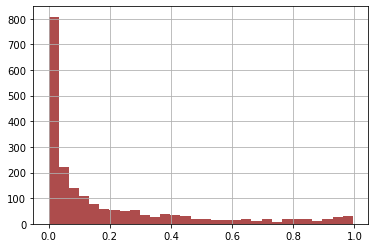

In [53]:
df['acousticness'].hist(bins=30, color='darkred',alpha=0.7)

print(df['acousticness'].describe())

<AxesSubplot:>

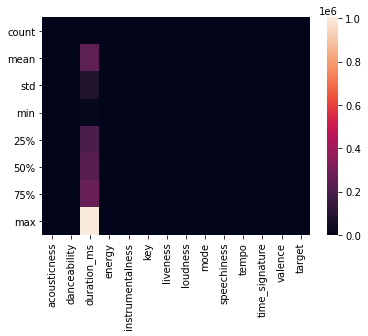

In [62]:
sns.heatmap(df[num_cols].describe())

<AxesSubplot:>

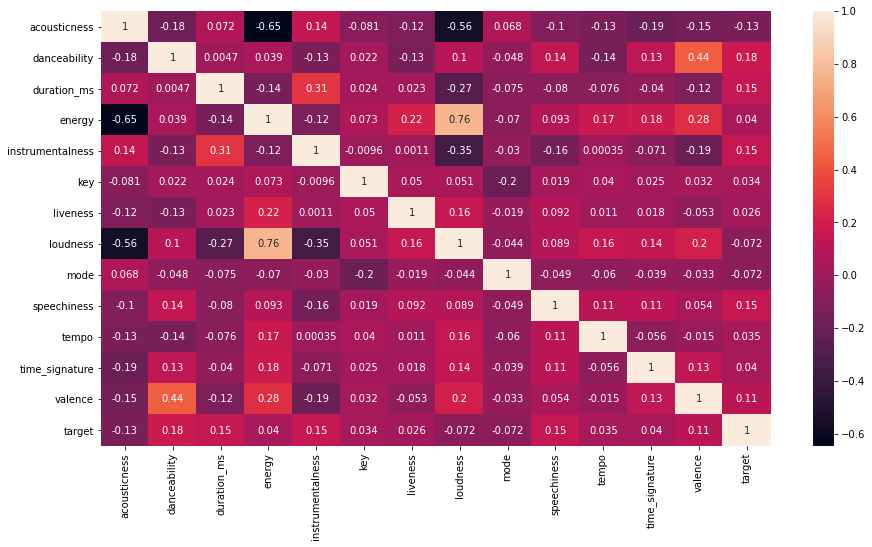

In [67]:
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True)

<AxesSubplot:xlabel='target', ylabel='danceability'>

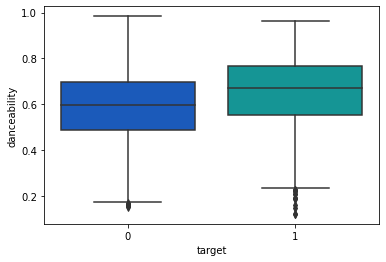

In [71]:
sns.boxplot(x='target',y='danceability', data= df, palette='winter')

In [72]:
#Dropping the categorical columns
df.drop(columns=cat_cols,axis=1,inplace=True)

In [75]:
skewness_array = []
for items in df[num_cols]:
    skewness_array.append([items,df[items].skew(),df[items].kurt()])


skew_df = pd.DataFrame(skewness_array,columns = ['Columns','Skewness','Kurtosis'])
skew_df

,Columns,Skewness,Kurtosis
0,acousticness,1.658393,1.745621
1,danceability,-0.419610,-0.207512
2,duration_ms,2.499012,11.902423
3,energy,-0.913010,0.572619
4,instrumentalness,1.952755,2.261180
5,key,-0.009360,-1.338827
6,liveness,1.952703,4.095644
7,loudness,-2.226556,7.908473
8,mode,-0.461301,-1.788976
9,speechiness,2.309581,6.260201


In [76]:
X = df.drop('target',axis=1)
y = df['target']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1351, 13)
(666, 13)
(1351,)
(666,)


In [99]:
clf = RandomForestClassifier()
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
NBclf = GaussianNB()

model_select = [clf, logreg, dt, NBclf]

def model_selection(model_select):

    for items in model_select:
        print('Cross Val Score of Model {} is {}'
        .format(items, round(cross_val_score(items, X_train, y_train, cv= 5, scoring ='accuracy').mean(),2)))


model_selection(model_select=model_select)


Cross Val Score of Model RandomForestClassifier() is 0.77
Cross Val Score of Model LogisticRegression() is 0.51
Cross Val Score of Model DecisionTreeClassifier() is 0.67
Cross Val Score of Model GaussianNB() is 0.61


In [100]:
#Since the Random Forest classification model has the highest accuracy score
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [103]:
accuracy_score(y_test,y_pred)

0.7807807807807807